# Processamento de Séries Temporais

## IF706 - Introdução à Ciência de Dados

### Guilherme Peixoto - MSc. candidate, Data Scientist @ In Loco


## Por quê?

* Nem todos os dados são estruturados
* Muitos dados chegam em tempo real, em forma de eventos
* Geralmente formam séries temporais
* Necessidade de tomar ações sobre dados em tempo real
* Sequência ou grupo de eventos → ação

## Aplicações

* Trading algorítimico
* *Smart Patient Care*
* Detecção de anomalias
* IoT: Smart Car, Smart Home
* Alocação dinâmica de recursos -- previsão de demanda por energia na rede elétrica
* Monitoramento
* Manutenção preventiva
* Geospatial data processing
* Etc, etc, etc

![](https://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2017/06/HEADER.png)


## Métodos de previsão

### Clássicos

* Moving average
* ARIMA
* Exponential smoothing
* …

Outros: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

### Machine Learning

* RNNs
* Gradient boosting
* etc

Métodos de regressão em geral, desde que apropriadamente modelado.

## Como identificar que é um problema de série temporal?

Existe um caráter de autocorrelação entre a observação atual e um grupo de observações anteriores; ie - os eventos não são independentes.

## Como modelar o problema?

O problema de *forecasting* em séries temporais pode ser modelado tanto como um problema de classificação quanto um problema de regressão.

* **Regressão**: qual será a temperatura média do próximo mês?
* **Classificação**: a temperatura média do próximo mês será maior ou menor? (binário)


## Trabalhando com séries temporais em Pandas

A unidade básica é a `datetime`, que é um objeto que armazena uma série de informações e métodos para manipular unidades de tempo.

In [0]:
from datetime import datetime
dt = datetime(year=2015, month=7, day=4)
print(f"Date is: {dt}")

dt = datetime.now()
print(f"Now is: {dt}")

# possível formatar diretamente a string
dt = datetime.now()
print(f"Hoje é: {dt:%d/%m/%Y}, dia da semana: {dt:%a} ou {dt:%A}")

Date is: 2015-07-04 00:00:00
Now is: 2019-04-09 18:25:11.093143
Hoje é: 09/04/2019, dia da semana: Tue ou Tuesday


O `numpy` possui um tipo específico para lidar com datetime, que é o `np.datetime64`, utilizado para indexar dataframes de séries temporais. Com isso, podemos fazer operações vetorizadas.

In [0]:
import numpy as np
date_index = np.datetime64("2018-07-02") + np.arange(12)
date_index

array(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
       '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
       '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13'],
      dtype='datetime64[D]')

### `DatetimeIndex`

Podemos manipular diretamente no `pandas` para criar *índices* temporais.

In [0]:
import pandas as pd
date = pd.to_datetime("2018-07-02")
date += pd.to_timedelta(np.arange(60), 'D')
date

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
               '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
               '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29',
               '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
               '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26',
      

In [0]:
df = pd.DataFrame(np.arange(len(date)), index=date)
df.tail()

,0
2018-08-26,55
2018-08-27,56
2018-08-28,57
2018-08-29,58
2018-08-30,59


Podemos indexar diretamente pelo tempo:

In [0]:
df["2018-07-05" : "2018-07-08"]

,0
2018-07-05,3
2018-07-06,4
2018-07-07,5
2018-07-08,6


In [0]:
df["2018-07"].tail()

,0
2018-07-27,25
2018-07-28,26
2018-07-29,27
2018-07-30,28
2018-07-31,29


### `pd.date_range`

Regularmente é usada essa função para criar "fatias" de tempo.

In [0]:
pd.date_range('2018-07-02', '2018-07-03', freq='D')

DatetimeIndex(['2018-07-02', '2018-07-03'], dtype='datetime64[ns]', freq='D')

In [0]:
pd.date_range('2018-07-02', periods=20, freq='s')

DatetimeIndex(['2018-07-02 00:00:00', '2018-07-02 00:00:01',
               '2018-07-02 00:00:02', '2018-07-02 00:00:03',
               '2018-07-02 00:00:04', '2018-07-02 00:00:05',
               '2018-07-02 00:00:06', '2018-07-02 00:00:07',
               '2018-07-02 00:00:08', '2018-07-02 00:00:09',
               '2018-07-02 00:00:10', '2018-07-02 00:00:11',
               '2018-07-02 00:00:12', '2018-07-02 00:00:13',
               '2018-07-02 00:00:14', '2018-07-02 00:00:15',
               '2018-07-02 00:00:16', '2018-07-02 00:00:17',
               '2018-07-02 00:00:18', '2018-07-02 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### Métodos

In [0]:
!pip install --quiet pandas-datareader

In [0]:
from datetime import datetime
import pandas_datareader.data as web
start = datetime(2015, 1, 1)
end = datetime(2018, 12, 31)
df = web.DataReader('F', 'iex', start, end)
df.index = pd.to_datetime(df.index) # indice nao vem como datetime
df.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,7.8728,7.8728,7.4797,7.4994,38709511
2018-12-26,7.5976,7.7254,7.2831,7.7156,58809955
2018-12-27,7.6861,7.7156,7.4011,7.7156,49812964
2018-12-28,7.6959,7.9023,7.6271,7.6763,47331686
2018-12-31,7.7156,7.7254,7.3716,7.5190,57816044


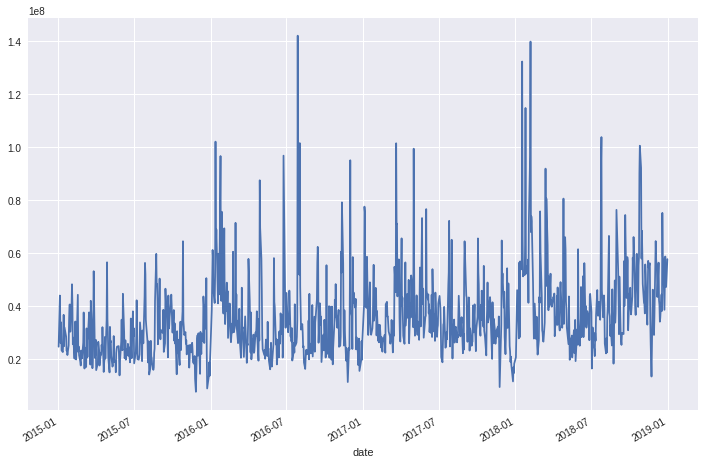

In [0]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12, 8))
data = df.volume
data.plot()

Uma necessidade comum com séries temporais é de obter uma amostra do dado em uma frequência menor do que o dado original, seja agrupando ou seja selecionando.

* `asfreq`: *data selection*
* `resample`: *data aggregation*

No exemplo abaixo, `resample` mostra a média do ano anterior, enquanto `asfreq` reporta o valor final ao fim do ano.

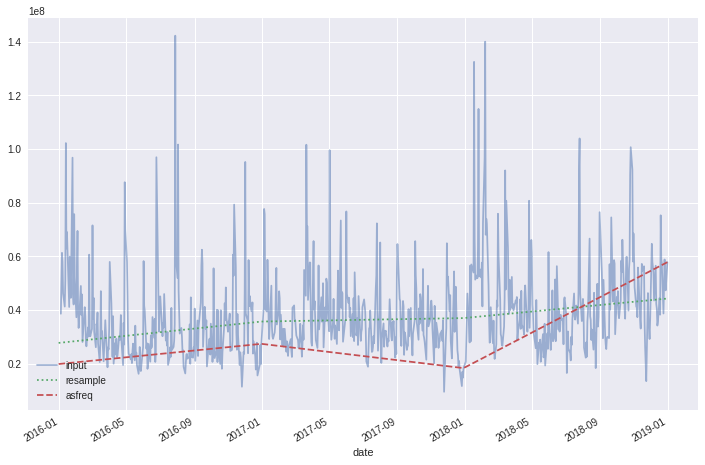

In [0]:
plt.figure(figsize=(12, 8))
data["2016":].plot(alpha=0.5, style='-')
data.resample('BA').mean().plot(style=':')
data.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='lower left');

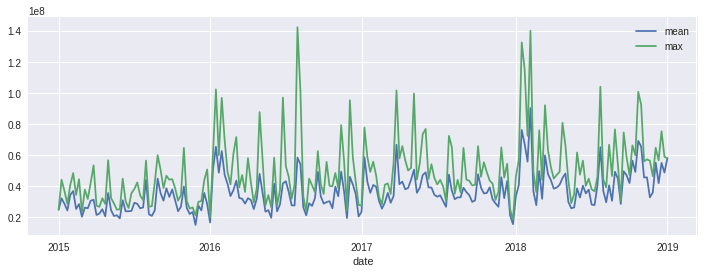

In [0]:
plt.figure(figsize=(12, 4))
data.resample("W").mean().plot(label='mean')
data.resample("W").max().plot(label='max')
plt.legend()

### Janela deslizante

Outra aplicação comum em processamento de séries temporais são operações de janelas deslizantes. 

Rolling [window=182,center=False,axis=0]

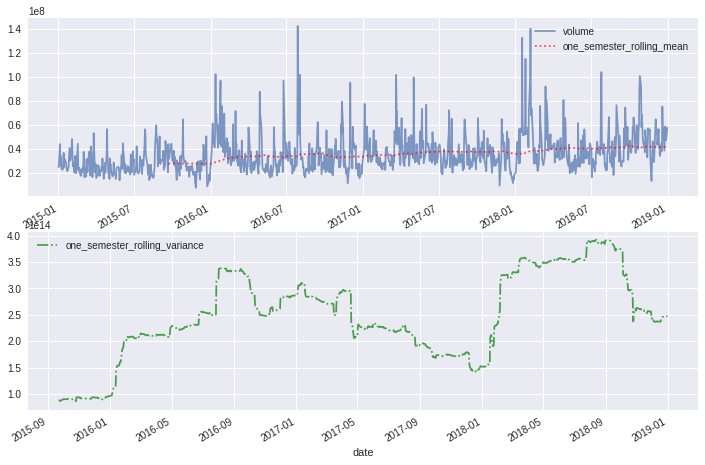

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
data.plot(alpha=.7)
(data.rolling(182)
 .mean()
 .plot(label="one_semester_rolling_mean", style='r:', alpha=.7)
)
plt.legend()

plt.subplot(212)
(data.rolling(182)
 .var()
 .plot(label="one_semester_rolling_variance", style='g-.', alpha=.7)
)
plt.legend()

In [0]:
data.resample("m") # reamostragem de acordo com o mes
data.rolling(182).mean() # funcoes de janela deslizente 
data.index.dayofweek # transforma todo mundo do indice em dayofweek
data.groupby # funcao de agrupamento

Int64Index([ 2,  5,  6,  7,  8,  9, 12, 13, 14, 15,
            ...
            17, 18, 19, 20, 21, 24, 26, 27, 28, 31],
           dtype='int64', name='date', length=1006)

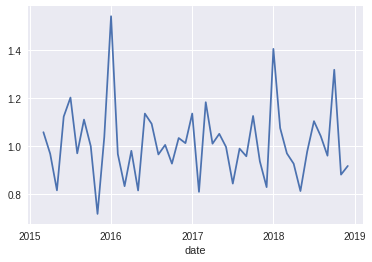

In [0]:
resampled = data.resample("m").sum()
resp = (resampled / resampled.rolling(3).mean())
resp.plot()

### Exercícios

1. Plote um gráfico que mostra a variação percentual mensal entre o volume de *trades* ocorridos nesse mês em relação à média dos últimos 3 meses.

2. Qual o dia da semana que há maior volume de *trades*? Plot um gráfico que mostra a mediana de trades por dia da semana (pode ser um gráfico de barras).
 
    *Hint #1*: manipule o índice temporal.
    
    *Hint #2*: use a operação de agrupamento `groupby`.

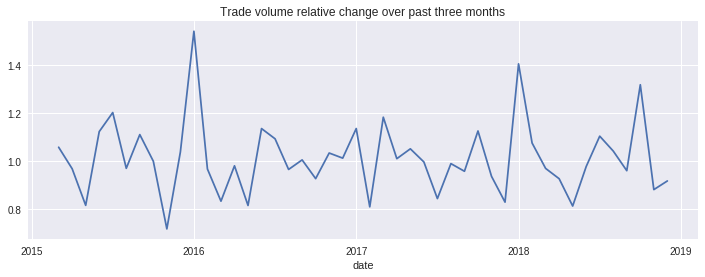

In [0]:
plt.figure(figsize=(12, 4))
monthly = data.resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="Trade volume relative change over past three months")

In [0]:
data.groupby((data.index.dayofweek)).median()

date
0    31457405.0
1    34224231.0
2    33688312.5
3    32934034.0
4    31128081.5
Name: volume, dtype: float64

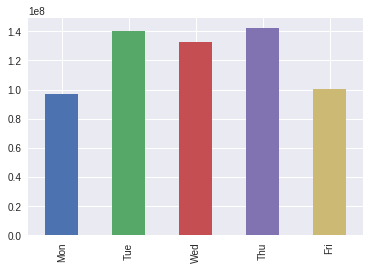

In [0]:
median_by_day = data.groupby(data.index.dayofweek).max()
median_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri"]
median_by_day.plot(kind="bar")

## Bonus: Prophet

> "Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."

Utilizaremos para ver quão bom o `prophet` é em prever um indicador da bolsa de valores (e exatamente porque você não deveria fazer isso).

In [0]:
!pip install --quiet fbprophet

In [0]:
from fbprophet import Prophet

prophet_df = df[["close"]].reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df.tail()

,ds,y
1001,2018-12-24,7.4994
1002,2018-12-26,7.7156
1003,2018-12-27,7.7156
1004,2018-12-28,7.6763
1005,2018-12-31,7.5190


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


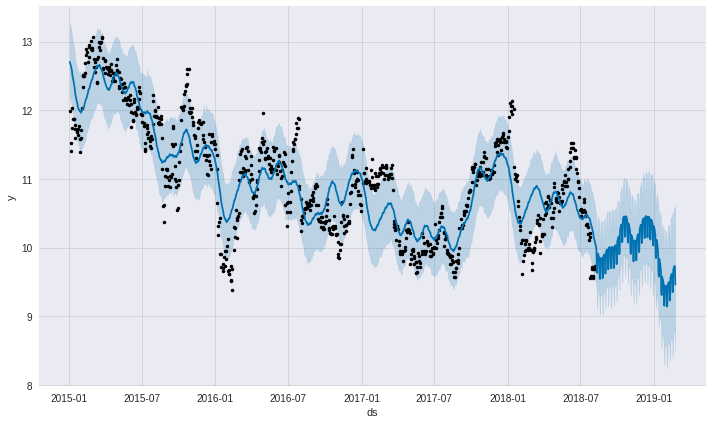

In [0]:
m = Prophet()
m.fit(prophet_df[:-100])
pred = m.predict(m.make_future_dataframe(periods=200))
m.plot(pred); # weird bug causes to plot twice, put ; in the end

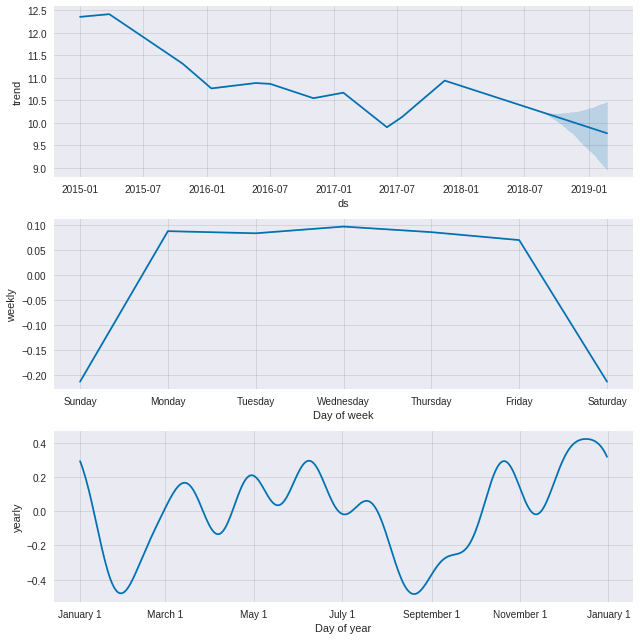

In [0]:
m.plot_components(pred);

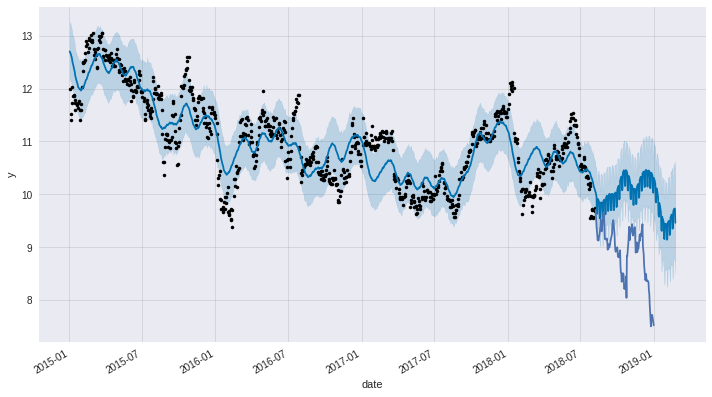

In [0]:
m.plot(pred); # weird bug causes to plot twice, put ; in the end
df.close[-100:].plot()

## Referências

### Tutoriais:

* Vários notebooks com tutoriais: https://github.com/jakevdp/PythonDataScienceHandbook/ (maior parte da aula veio daqui)
* prophet docs: https://facebook.github.io/prophet/docs/quick_start.html#python-api
* statsmodels docs: https://www.statsmodels.org/stable/examples/index.html#stats


### Indústria:

* **Uber**
    * [Forecasting at Uber: An Introduction](https://eng.uber.com/forecasting-introduction/)
    * [Engineering Extreme Event Forecasting at Uber with Recurrent Neural Networks](https://eng.uber.com/neural-networks/) (Avançado)
    
* **Lyft**
    * [How to deal with the seasonality of a market?](https://eng.lyft.com/how-to-deal-with-the-seasonality-of-a-market-584cc94d6b75)
    
* **Airbnb**
    * [Learning Market Dynamics for Optimal Pricing](https://medium.com/airbnb-engineering/learning-market-dynamics-for-optimal-pricing-97cffbcc53e3)
    * [Anomaly Detection for Aibnb's Payment Platform](https://medium.com/airbnb-engineering/anomaly-detection-for-airbnb-s-payment-platform-e3b0ec513199)